# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [1]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

import seaborn as sns

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')
df_labels = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta', iterator=True).variable_labels()

#  Summary statistics

Inspect the data.

In [2]:
df_labels # what do the labels mean?

{'idcode': 'NLS ID',
 'year': 'interview year',
 'birth_yr': 'birth year',
 'age': 'age in current year',
 'race': 'race',
 'msp': '1 if married, spouse present',
 'nev_mar': '1 if never married',
 'grade': 'current grade completed',
 'collgrad': '1 if college graduate',
 'not_smsa': '1 if not SMSA',
 'c_city': '1 if central city',
 'south': '1 if south',
 'ind_code': 'industry of employment',
 'occ_code': 'occupation',
 'union': '1 if union',
 'wks_ue': 'weeks unemployed last year',
 'ttl_exp': 'total work experience',
 'tenure': 'job tenure, in years',
 'hours': 'usual hours worked',
 'wks_work': 'weeks worked last year',
 'ln_wage': 'ln(wage/GNP deflator)'}

In [4]:
##Visualize the dataset
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215322,3.123830,36.559560,53.989328,1.674888
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652105,3.751425,9.869623,29.032325,0.478094
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


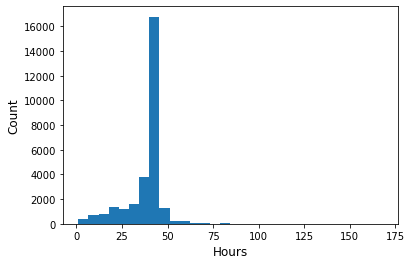

In [5]:
# We are interested in the hours_worked. Let's look at a histogram
import matplotlib.pyplot as plt
plt.hist(data["hours"], bins = 30)
plt.xlabel("Hours", size=12)
plt.ylabel('Count', size=12)
plt.show()

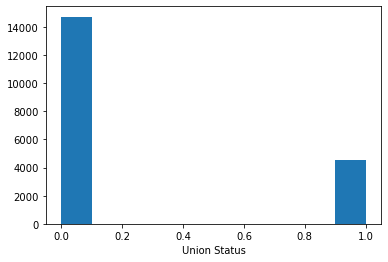

In [6]:
# Also let's check how many people there are that have union status, compared to not
plt.hist(data["union"])
plt.xlabel("Union Status")
plt.show()

C:\Users\joppe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joppe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


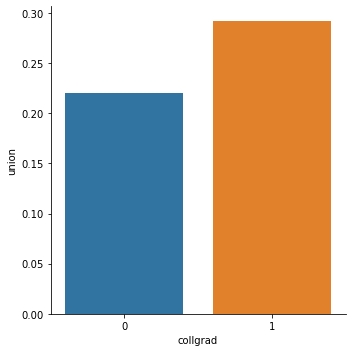

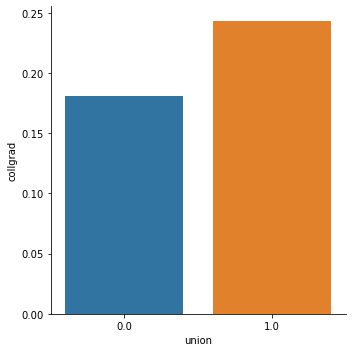

In [7]:
##tabulate college and union status. Is there some difference in union status between college grads and non-grads
sns.catplot('collgrad', 'union', kind = 'bar', data = data, ci=None)
sns.catplot('union', 'collgrad', kind = 'bar', data = data, ci=None)

In [10]:
##generate a variable for log hours worked
data['ln_hours'] = np.log(data['hours'])

C:\Users\joppe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


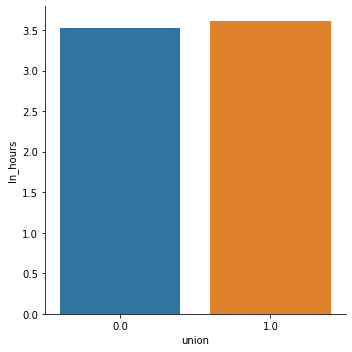

In [12]:
sns.catplot('union', 'ln_hours', kind = 'bar', data = data, ci=None)
# Unionized people work more hours on average (although slightly as measure on log scale)

<AxesSubplot:xlabel='year', ylabel='ln_hours'>

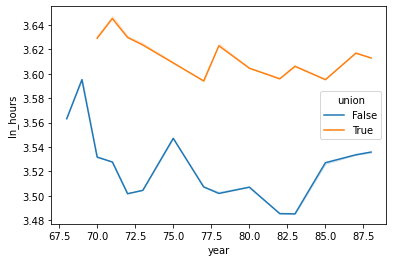

In [13]:
##plot log hours against year separately for union and non-union
import seaborn as sns
sns.lineplot(y = data['ln_hours'], x = data['year'], hue = (data["union"]==1), ci = False )

<AxesSubplot:xlabel='year', ylabel='ln_hours'>

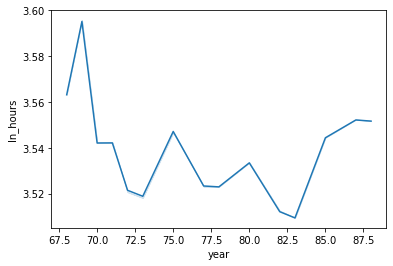

In [46]:
# Plot without the different 
sns.lineplot(y = data['ln_hours'], x = data['year'], ci = False)

<AxesSubplot:xlabel='year', ylabel='ln_hours'>

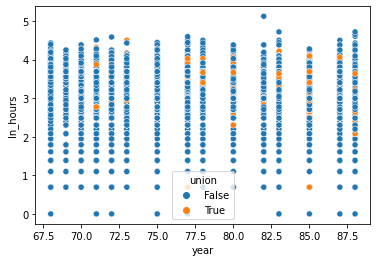

In [16]:
# In this scatterplot we can see that the line plot uses some averaging!
sns.scatterplot(x = data['year'], y = data['ln_hours'], ci = False, hue = (data["union"]==1))

# Regression: Effect of union status on hours worked

In [17]:
##Regress hours worked against union status and display the results
res = smf.ols("ln_hours ~ C(union)", data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_hours   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     147.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           8.08e-34
Time:                        12:49:27   Log-Likelihood:                -9865.7
No. Observations:               19202   AIC:                         1.974e+04
Df Residuals:                   19200   BIC:                         1.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5270      0.003   1057.147      0.000       3.521       3.534
C(union)[T.1.0]     0.0837      0.007     12.145      0.000       0.070       0.097
==============================================================================
Omnibus:                    13206.652   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188252.342
Skew:                          -3.212   Prob(JB):                         0.00
Kurtosis:                      16.930   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval

coef = 0.0837 
se = 0.007 
t_stat = 12.145 
p_val = 0.000 
ci_lower = 0.070 
ci_upper = 0.097

#### What is the identification assumption for the coefficient on union to be causal?

We make the assumption that there are no confounders in this regression. Hence there are no confounders for the relationship between union status and hours worked

In [18]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
res_2 = smf.ols("ln_hours ~ C(union) + C(collgrad)", data=data).fit()
res_2.summary()
# We can see that the coefficient for the union variable is very similar in size compared to the situation 
# where we did not include collgrad. Also the standard error is similar.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_hours   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.64
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           4.70e-42
Time:                        12:49:40   Log-Likelihood:                -9844.0
No. Observations:               19202   AIC:                         1.969e+04
Df Residuals:                   19199   BIC:                         1.972e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5183      0.004    980.244      0.000       3.511       3.525
C(union)[T.1.0]      0.0806      0.007     11.689      0.000       0.067       0.094
C(collgrad)[T.1]     0.0486      0.007      6.590      0.000       0.034       0.063
==============================================================================
Omnibus:                    13269.332   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190671.205
Skew:                          -3.230   Prob(JB):                         0.00
Kurtosis:                      17.020   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
## add occupation codes to the regression and compare the results with the previous one
res_3 = smf.ols("ln_hours ~ C(union) + C(collgrad) + C(occ_code)", data=data).fit()
res_3.summary()
# We see that the coeffecient for union status went down from about 0.8 to about 0.5. 
# Also the coefficient for college graduate status went down.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_hours   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     110.1
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.32e-308
Time:                        12:50:05   Log-Likelihood:                -9153.3
No. Observations:               19129   AIC:                         1.834e+04
Df Residuals:                   19114   BIC:                         1.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5113      0.009    370.285      0.000       3.493       3.530
C(union)[T.1.0]         0.0541      0.007      7.792      0.000       0.040       0.068
C(collgrad)[T.1]        0.0299      0.009      3.249      0.001       0.012       0.048
C(occ_code)[T.2.0]      0.1697      0.014     12.294      0.000       0.143       0.197
C(occ_code)[T.3.0]      0.0280      0.010      2.781      0.005       0.008       0.048
C(occ_code)[T.4.0]     -0.1737      0.017    -10.440      0.000      -0.206      -0.141
C(occ_code)[T.5.0]      0.1399      0.023      6.003      0.000       0.094       0.186
C(occ_code)[T.6.0]      0.1085      0.012      8.969      0.000       0.085       0.132
C(occ_code)[T.7.0]     -0.5488      0.025    -21.809      0.000      -0.598      -0.500
C(occ_code)[T.8.0]     -0.0900      0.012     -7.487      0.000      -0.114      -0.066
C(occ_code)[T.9.0]     -0.1823      0.226     -0.808      0.419      -0.625       0.260
C(occ_code)[T.10.0]     0.0426      0.054      0.796      0.426      -0.062       0.147
C(occ_code)[T.11.0]     0.0452      0.038      1.178      0.239      -0.030       0.120
C(occ_code)[T.12.0]     0.1668      0.175      0.953      0.340      -0.176       0.510
C(occ_code)[T.13.0]     0.0581      0.014      4.108      0.000       0.030       0.086
==============================================================================
Omnibus:                    12822.217   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188096.547
Skew:                          -3.080   Prob(JB):                         0.00
Kurtosis:                      17.073   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?

Occupation can be seen as a mediator. When someone is very motivated to be in a union, they might select themselves into certain jobs (that might be classic "union" jobs). Hence there is an effect from the treatment on occupation, which will later affect hours worked. When we would adjust for this mediator, we would introduce a bias in our estimate of the coefficients.

#### What are "good controls" in the dataset in terms of being exogenous to union status?

- The year of the interview might be a good control. It can be seen as a confounder as it influences the decision to be part of a union as well as working hours. The idea behind is that there is a general trend in society of de-unionization. Hence the earlier the interview was performed, the more likely someone might be to be part of a union. Moreover, there have been societal changes in the number of hours worked. Hence it also directly influences the hours worked.(The question with this variable can be whether to include it as a categorical or continuous variable)
- Age. Age might have both an effect on the decision to become part of a union as well as on the number of hours worked. It is thus a confounder. However, it will be very correlated to the year-of-interview variable (because of the panel structure). Hence it might give some statistical issues in the estimation due to multicollinearity. 

In [20]:
##add these controls to the regression
res_4 = smf.ols("ln_hours ~ C(union) + C(collgrad) + (year) + age", data=data).fit()
res_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_hours   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     65.76
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.44e-55
Time:                        12:52:47   Log-Likelihood:                -9805.6
No. Observations:               19193   AIC:                         1.962e+04
Df Residuals:                   19188   BIC:                         1.966e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.3667      0.060     55.713      0.000       3.248       3.485
C(union)[T.1.0]      0.0820      0.007     11.895      0.000       0.068       0.095
C(collgrad)[T.1]     0.0526      0.007      7.104      0.000       0.038       0.067
year                 0.0046      0.001      4.391      0.000       0.003       0.007
age                 -0.0071      0.001     -7.366      0.000      -0.009      -0.005
==============================================================================
Omnibus:                    13249.166   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191293.797
Skew:                          -3.223   Prob(JB):                         0.00
Kurtosis:                      17.059   Cond. No.                     1.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### How do these change your estimates?
Adding these two control variables seem to keep the estimate of the coefficient for union status mostly unchanged compared to the first regression with only union status and the second regression with collgrad and union status. This surpises me a bit. If they were true confounders, then exluding them would lead to omitted variable bias. My question is now: since the estimate did not change, does that mean that they are not necessarily confounders?

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**


https://www.foxnews.com/health/taking-10k-steps-associated-reduction-risk-cancer-cardiovascular-disease-deaths-study

This article establishes a potential relationship between taking 10,000 steps daily with a reduction in reisk for cancer. Even though the study that the article is based on does not establish any causal relationships (people were simply tracked and not randomly assigned in treatment and control groups). 

The article deserves some credit in that it actually highlights that no pure causal claims can be made. However, this is only done in the last paragraph. Moreover, the rest of the text is full of claims that can still be interpreted as causal, hence framing the message wrongly. The article, for example, states: "A group of international researchers found in a Sept. 12 study that higher step intensity may provide additional benefits". This is not a purely causal claim and it uses "uncertain words" like "may". Moreover, throughout the article the author uses the word "associated", which leans towards the side of correlation. 

In short, this article makes an effort to tone down the causal language. However, in wording the article still hints towards causal effects when only correlations have been established.

[type your comments here, or attach as separate document.]